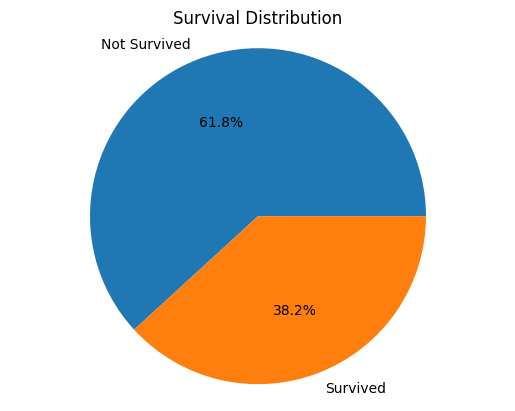

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('titanic3.csv')


counts = df['survived'].value_counts().sort_index()

labels = ['Not Survived', 'Survived']
values = [counts.get(0, 0), counts.get(1, 0)]

plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Survival Distribution')
plt.show()

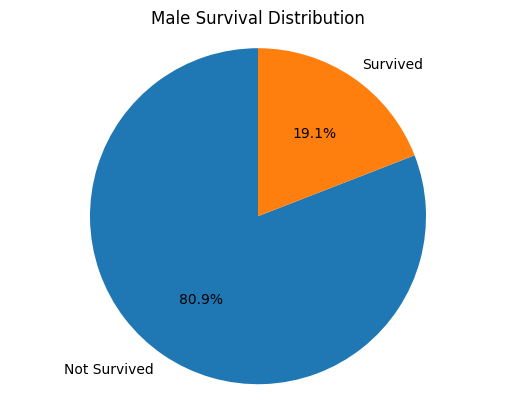

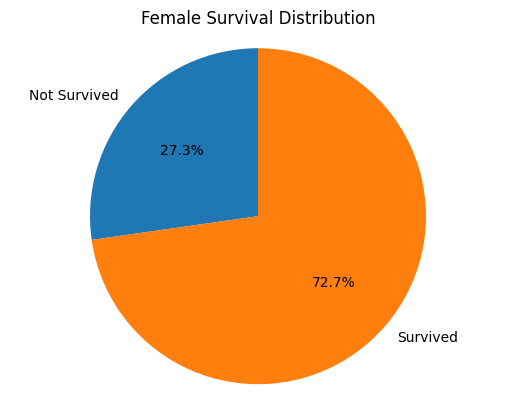

In [2]:
df_males = df[df['sex'] == 'male'][['survived']]

counts = df_males['survived'].value_counts().sort_index()
labels = ['Not Survived', 'Survived']
sizes = [counts.get(0, 0), counts.get(1, 0)]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Male Survival Distribution')
plt.show()



df_females = df[df['sex'] == 'female'][['survived']]

counts = df_females['survived'].value_counts().sort_index()
labels = ['Not Survived', 'Survived']
sizes = [counts.get(0, 0), counts.get(1, 0)]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Female Survival Distribution')
plt.show()

/var/folders/2c/g85vlljj3fn_w_xmbshl1br00000gn/T/ipykernel_23028/3105203222.py:8: RuntimeWarning: invalid value encountered in scalar divide
  not_survived_props.append((subset == 0).sum() / total)
/var/folders/2c/g85vlljj3fn_w_xmbshl1br00000gn/T/ipykernel_23028/3105203222.py:9: RuntimeWarning: invalid value encountered in scalar divide
  survived_props.append((subset == 1).sum() / total)


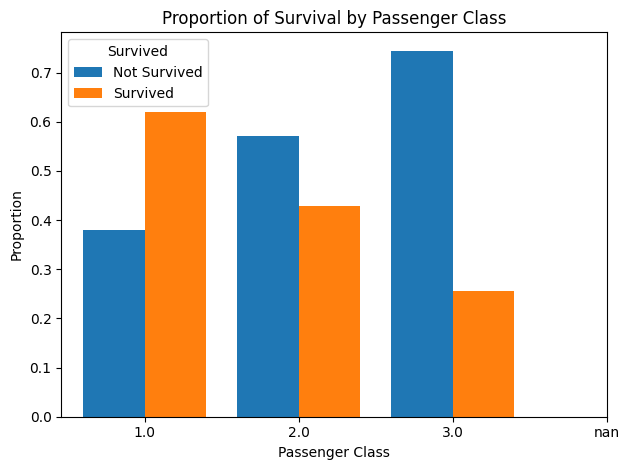

In [3]:
pclasses = sorted(df['pclass'].unique())
not_survived_props = []
survived_props = []

for c in pclasses:
    subset = df[df['pclass'] == c]['survived']
    total = len(subset)
    not_survived_props.append((subset == 0).sum() / total)
    survived_props.append((subset == 1).sum() / total)



x = np.arange(len(pclasses))
width = 0.40



plt.figure()
plt.bar(x - width/2, not_survived_props, width, label='Not Survived')
plt.bar(x + width/2, survived_props, width, label='Survived')

plt.xlabel('Passenger Class')
plt.ylabel('Proportion')
plt.title('Proportion of Survival by Passenger Class')
plt.xticks(x, pclasses)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

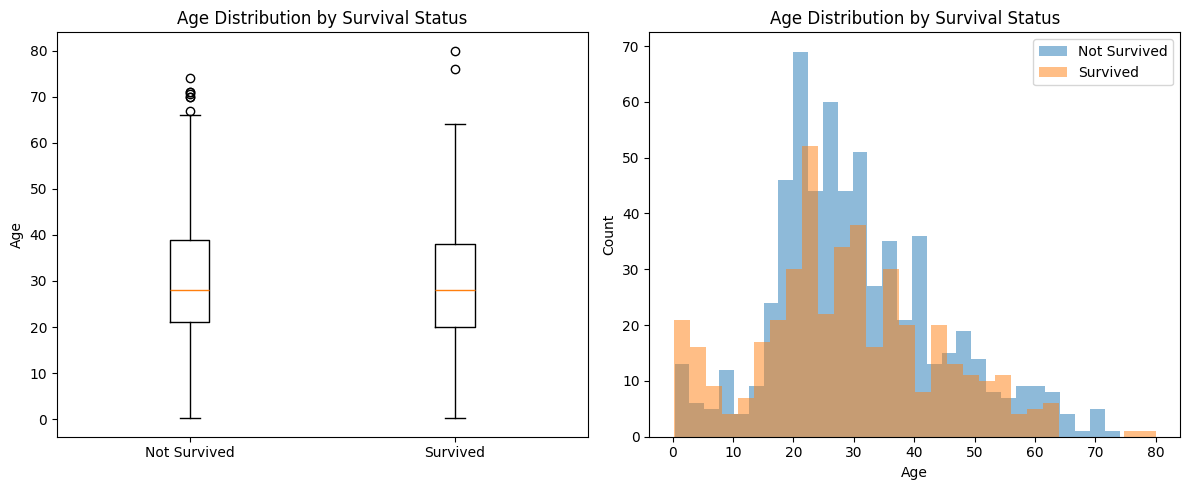

In [4]:




ages_not_survived = df[df['survived'] == 0]['age'].dropna()
ages_survived = df[df['survived'] == 1]['age'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot([ages_not_survived, ages_survived], tick_labels=['Not Survived', 'Survived'])
axes[0].set_ylabel('Age')
axes[0].set_title('Age Distribution by Survival Status')

axes[1].hist(ages_not_survived, bins=30, alpha=0.5, label='Not Survived')
axes[1].hist(ages_survived, bins=30, alpha=0.5, label='Survived')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_title('Age Distribution by Survival Status')
axes[1].legend()

plt.tight_layout()
plt.show()


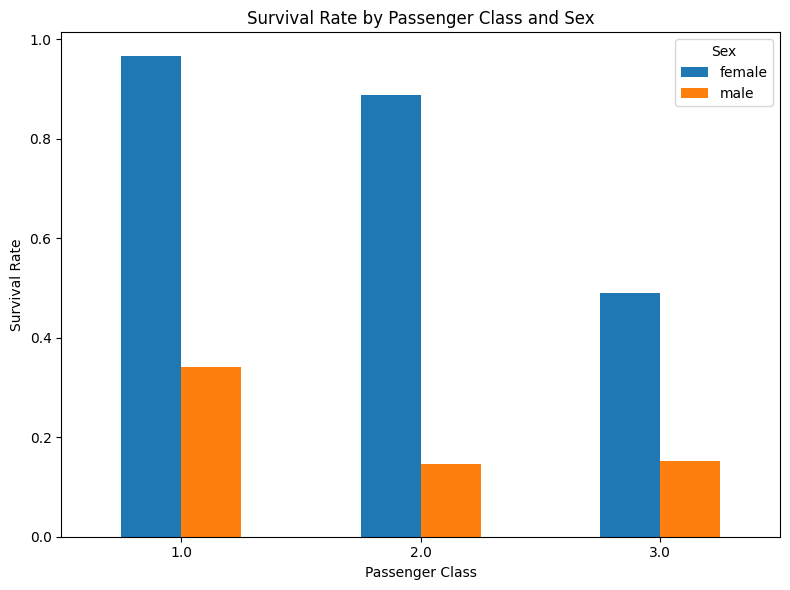

In [5]:
survival_rate = df.groupby(['pclass', 'sex'])['survived'].mean().unstack()


ax = survival_rate.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Sex')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()